<a href="https://colab.research.google.com/github/fadelhamid/projet_vision_2D/blob/main/pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

# Montez votre Google Drive
drive.mount('/content/drive')


In [3]:
import zipfile
chemin_fichier_zip = '/content/drive/MyDrive/dataset.zip'  # Remplacez par le chemin de votre fichier ZIP
chemin_dossier_extraction = '/content/projetM2'  # Remplacez par le chemin du dossier d'extraction


In [4]:
with zipfile.ZipFile(chemin_fichier_zip, 'r') as zip_ref:
    zip_ref.extractall('/content/projetM2')

début du code



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


In [ ]:
# Spécification des chemins vers nos ensembles de données (train, validation, test)
train_dir = '/content/projetM2/dataset/train'
validation_dir = '/content/projetM2/dataset/validation'
test_dir = '/content/projetM2/dataset/test'

In [ ]:
# Paramètres
batch_size = 32
image_size = (128, 128)  # Redimensionnement des images en 128x128 pixels
input_shape = (128, 128, 3)  # Taille des images en couleur (RGB)


In [ ]:
# Augmentation des données pour le set d'entraînement
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
# Normalisation des données pour les sets de validation et de test
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
# Chargement des images depuis les répertoires avec les générateurs
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 4034 images belonging to 2 classes.
Found 1800 images belonging to 2 classes.
Found 1800 images belonging to 2 classes.


In [ ]:
# Définition du modèle CNN
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
model.add(BatchNormalization())

model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 63, 63, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                        

In [ ]:
# Compilation du modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Entraînement du modèle
history = model.fit(train_generator, validation_data=validation_generator, epochs=10)


Epoch 1/10
127/127 [==============================] - 222s 2s/step - loss: 1.6968 - accuracy: 0.5873 - val_loss: 0.7822 - val_accuracy: 0.5000
Epoch 2/10
127/127 [==============================] - 225s 2s/step - loss: 0.8809 - accuracy: 0.5940 - val_loss: 0.7959 - val_accuracy: 0.5028
Epoch 3/10
127/127 [==============================] - 229s 2s/step - loss: 0.6835 - accuracy: 0.6433 - val_loss: 0.6921 - val_accuracy: 0.4522
Epoch 4/10
127/127 [==============================] - 228s 2s/step - loss: 0.6586 - accuracy: 0.6644 - val_loss: 0.6497 - val_accuracy: 0.6317
Epoch 5/10
127/127 [==============================] - 216s 2s/step - loss: 0.6791 - accuracy: 0.6366 - val_loss: 0.5840 - val_accuracy: 0.7450
Epoch 6/10
127/127 [==============================] - 220s 2s/step - loss: 0.6432 - accuracy: 0.6758 - val_loss: 0.5708 - val_accuracy: 0.7317
Epoch 7/10
127/127 [==============================] - 218s 2s/step - loss: 0.6414 - accuracy: 0.6857 - val_loss: 0.5668 - val_accuracy: 0.7467

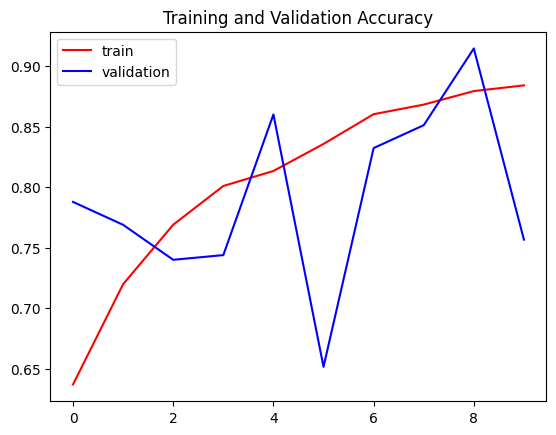

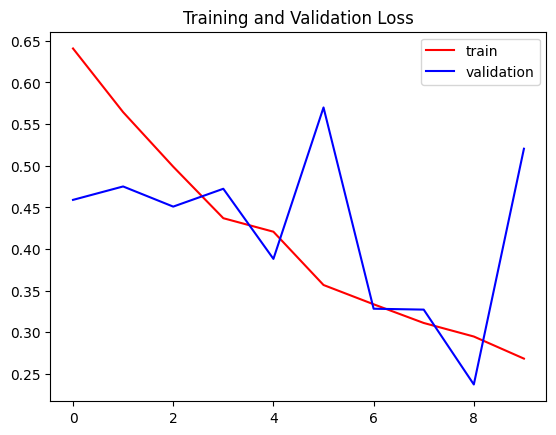

In [ ]:
# tracer graphe de précision et de perte
# Graphe de précision
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Graphe de perte
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Faire des prédictions sur l'ensemble de test
predictions = model.predict(test_generator)

# Convertir les prédictions en classes (0 ou 1)
predicted_classes = (predictions > 0.5).astype('int32')

# Afficher quelques exemples de prédictions
for i in range(5):  # Afficher les prédictions pour les 5 premières images du set de test
    print("Predicted:", predicted_classes[i], "Actual:", test_generator.labels[i])

57/57 [==============================] - 37s 643ms/step
Predicted: [1] Actual: 0
Predicted: [1] Actual: 0
Predicted: [0] Actual: 0
Predicted: [0] Actual: 0
Predicted: [1] Actual: 0


**Deuxième methode**


In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(128, 128, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.summary()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_generator, validation_data=validation_generator, epochs=10)

## ***autre code***

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


In [6]:
# Spécification des chemins vers nos ensembles de données (train, validation, test)
train_dir = '/content/projetM2/dataset/train'
validation_dir = '/content/projetM2/dataset/validation'
test_dir = '/content/projetM2/dataset/test'

In [7]:
# Paramètres
batch_size = 32
image_size = (128, 128)  # Redimensionnement des images en 128x128 pixels
input_shape = (128, 128, 3)  # Taille des images en couleur (RGB)


In [8]:
# Augmentation des données pour le set d'entraînement
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [9]:
# Normalisation des données pour les sets de validation et de test
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [10]:
# Chargement des images depuis les répertoires avec les générateurs
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)


Found 4034 images belonging to 2 classes.
Found 1800 images belonging to 2 classes.
Found 1800 images belonging to 2 classes.


In [11]:
# Définition du modèle CNN
model = Sequential()
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

#model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(256, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))  # Couche de sortie avec la fonction d'activation sigmoid pour la classification binaire

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 128)     3584      
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 128)     147584    
                                                                 
 max_pooling2d (MaxPooling2  (None, 62, 62, 128)       0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        73792     
                                                                 
 conv2d_3 (Conv2D)           (None, 58, 58, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 29, 29, 64)        0         
 g2D)                                                   

In [12]:
# Compilation du modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Définir l'arrêt précoce
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [13]:
# Entraînement du modèle
history = model.fit(train_generator, validation_data=validation_generator, epochs=10)


Epoch 1/10
127/127 [==============================] - 2092s 16s/step - loss: 0.6604 - accuracy: 0.5984 - val_loss: 0.5998 - val_accuracy: 0.7061
Epoch 2/10
127/127 [==============================] - 2074s 16s/step - loss: 0.6366 - accuracy: 0.6433 - val_loss: 0.5370 - val_accuracy: 0.7494
Epoch 3/10
127/127 [==============================] - 2072s 16s/step - loss: 0.5779 - accuracy: 0.7058 - val_loss: 0.4528 - val_accuracy: 0.7806
Epoch 4/10
127/127 [==============================] - 2123s 17s/step - loss: 0.5205 - accuracy: 0.7538 - val_loss: 0.4092 - val_accuracy: 0.8100
Epoch 5/10
127/127 [==============================] - 2100s 17s/step - loss: 0.4780 - accuracy: 0.7876 - val_loss: 0.4383 - val_accuracy: 0.7250
Epoch 6/10
127/127 [==============================] - 2090s 16s/step - loss: 0.4309 - accuracy: 0.8079 - val_loss: 0.3412 - val_accuracy: 0.8622
Epoch 7/10
127/127 [==============================] - 2086s 16s/step - loss: 0.4115 - accuracy: 0.8126 - val_loss: 0.3527 - val_ac

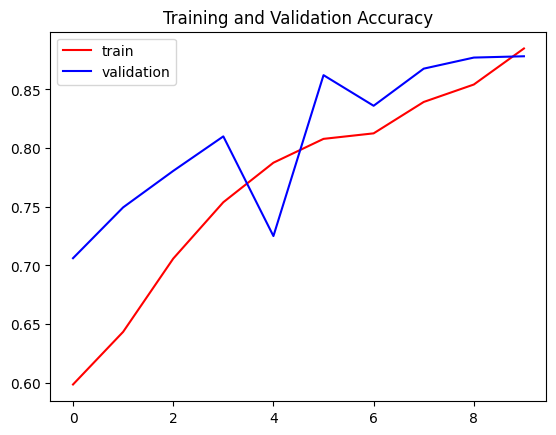

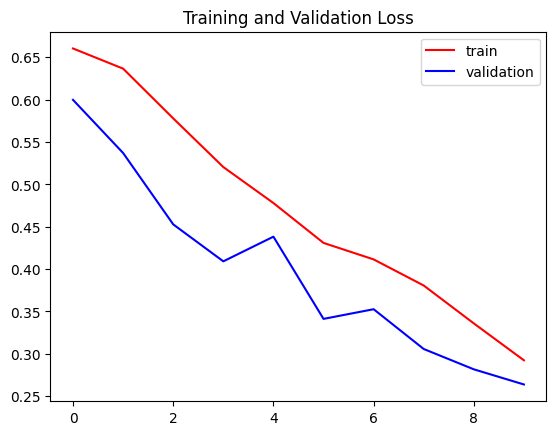

In [14]:
# tracer graphe de précision

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# tracer graphe de perte

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Prédiction sur l'ensemble de test
predictions = model.predict(test_generator)


57/57 [==============================] - 18s 313ms/step


In [15]:
# Évaluation du modèle sur l'ensemble de test
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Accuracy:", test_accuracy)


57/57 [==============================] - 252s 4s/step - loss: 0.2443 - accuracy: 0.9006
Test Accuracy: 0.9005555510520935


In [ ]:
import numpy as np

# Suppose que 'predictions' contient les prédictions de votre modèle sur l'ensemble de test

# Convertir les prédictions en classes (0 ou 1) en arrondissant les valeurs de prédiction
predicted_classes = np.round(predictions).flatten()

# Afficher les prédictions
print("Prédictions du modèle sur l'ensemble de test :")
print(predicted_classes)


In [16]:
# Faire des prédictions sur l'ensemble de test
predictions = model.predict(test_generator)

# Convertir les prédictions en classes (0 ou 1)
predicted_classes = (predictions > 0.5).astype('int32')

# Afficher quelques exemples de prédictions
for i in range(5):  # Afficher les prédictions pour les 5 premières images du set de test
    print("Predicted:", predicted_classes[i], "Actual:", test_generator.labels[i])

57/57 [==============================] - 246s 4s/step
Predicted: [0] Actual: 0
Predicted: [0] Actual: 0
Predicted: [1] Actual: 0
Predicted: [0] Actual: 0
Predicted: [1] Actual: 0


57/57 [==============================] - 244s 4s/step


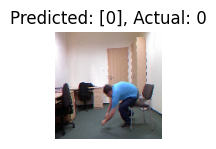

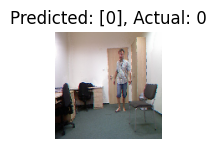

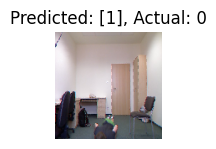

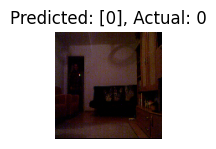

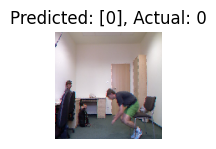

In [17]:
import matplotlib.pyplot as plt

# Faire des prédictions sur l'ensemble de test
predictions = model.predict(test_generator)

# Convertir les prédictions en classes (0 ou 1)
predicted_classes = (predictions > 0.5).astype('int32')

# Afficher quelques exemples de prédictions
num_images_to_show = 5

for i in range(num_images_to_show):  # Afficher les prédictions pour les 5 premières images du set de test
    plt.figure(figsize=(8, 8))
    plt.subplot(1, num_images_to_show, i+1)
    plt.imshow(test_generator[i][0][0])  # Afficher l'image
    plt.title(f"Predicted: {predicted_classes[i]}, Actual: {test_generator.labels[i]}")
    plt.axis('off')

plt.show()


In [25]:
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [26]:
test_img = cv2.imread('/content/projetM2/dataset/test/chute/adl-10-cam0-rgb-186.png')

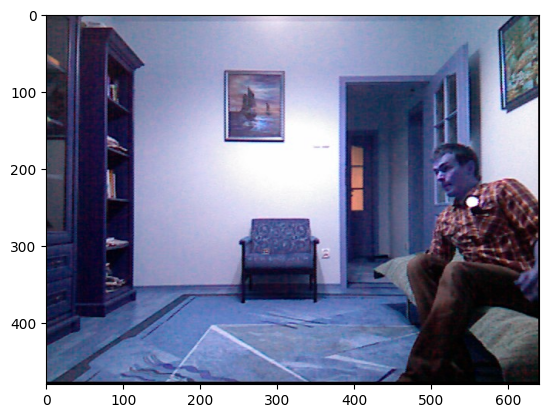

In [27]:
plt.imshow(test_img)

In [28]:
test_img.shape

(480, 640, 3)

In [29]:
test_img = cv2.resize(test_img,(256,256))

In [30]:
test_input = test_img.reshape((1,256,256,3))

In [31]:
# Effectuer la prédiction
prediction = model.predict(test_input)

InvalidArgumentError: ignored

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping

# Vos chemins vers les ensembles de données
train_dir = '/content/projetM2/dataset/train'
validation_dir = '/content/projetM2/dataset/validation'
test_dir = '/content/projetM2/dataset/test'

batch_size = 32
image_size = (128, 128)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

# Chargement du modèle VGG16 pré-entraîné
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Geler les couches du modèle pré-entraîné
for layer in vgg_model.layers:
    layer.trainable = False

# Création de votre modèle en ajoutant des couches supplémentaires
model = Sequential()
model.add(vgg_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Définir l'arrêt précoce
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entraîner le modèle avec l'arrêt précoce
history = model.fit(train_generator, validation_data=validation_generator, epochs=50, callbacks=[early_stopping])

# Évaluation du modèle sur l'ensemble de test
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Accuracy:", test_accuracy)


Found 4034 images belonging to 2 classes.
Found 1800 images belonging to 2 classes.
Found 1800 images belonging to 2 classes.
58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_13 (Dense)            (None, 256)               2097408   
                                                                 
 dropout_16 (Dropout)        (None, 256)               0         
                                                                 
 dense_14 (Dense)            (None, 1)                 257       
                                                             

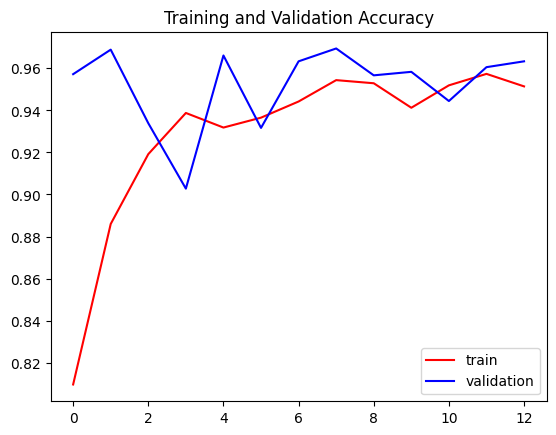

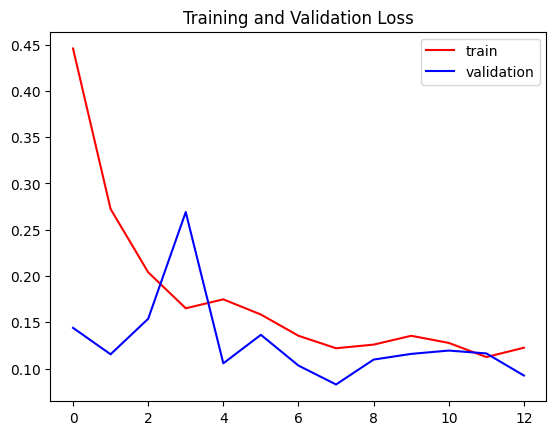

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# tracer graphe de perte

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Faire des prédictions sur l'ensemble de test
predictions = model.predict(test_generator)

# Convertir les prédictions en classes (0 ou 1)
predicted_classes = (predictions > 0.5).astype('int32')

# Afficher quelques exemples de prédictions
for i in range(5):  # Afficher les prédictions pour les 5 premières images du set de test
    print("Predicted:", predicted_classes[i], "Actual:", test_generator.labels[i])

57/57 [==============================] - 19s 330ms/step
Predicted: [0] Actual: 0
Predicted: [1] Actual: 0
Predicted: [1] Actual: 0
Predicted: [0] Actual: 0
Predicted: [0] Actual: 0


57/57 [==============================] - 19s 340ms/step


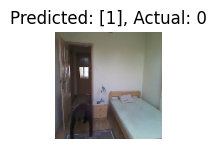

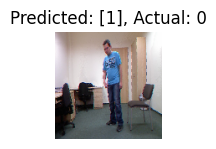

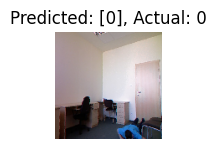

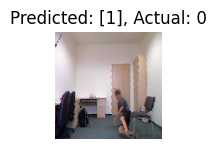

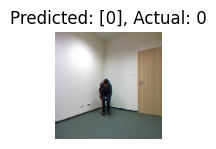

In [ ]:
import matplotlib.pyplot as plt

# Faire des prédictions sur l'ensemble de test
predictions = model.predict(test_generator)

# Convertir les prédictions en classes (0 ou 1)
predicted_classes = (predictions > 0.5).astype('int32')

# Afficher quelques exemples de prédictions
num_images_to_show = 5

for i in range(num_images_to_show):  # Afficher les prédictions pour les 5 premières images du set de test
    plt.figure(figsize=(8, 8))
    plt.subplot(1, num_images_to_show, i+1)
    plt.imshow(test_generator[i][0][0])  # Afficher l'image
    plt.title(f"Predicted: {predicted_classes[i]}, Actual: {test_generator.labels[i]}")
    plt.axis('off')

plt.show()














**VERIFICATION AVEC D'AUTRE MODEL**

**AUTRE TEST AVEC UN AUTRE CODE**


In [38]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [39]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/projetM2/dataset/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/projetM2/dataset/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 4034 files belonging to 2 classes.
Found 1800 files belonging to 2 classes.


In [40]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [48]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

#model.add(Dense(128,activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [49]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 30, 30, 128)      

In [50]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/projetM2/dataset/test/pasdechute/adl-01-cam0-rgb-007.png')

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)